# 프로젝트: 고양이 수염 스티커 만들기
---

## 목차
1. 스티커 구하기 or 만들기
2. 얼굴 검출 & 랜드마크 검출 하기
3. 스티커 적용 위치 확인하기
4. 스티커 적용하기
5. 문제점 찾아보기
  1. 안경벗은경우
  2. 좌/우측의 경우
  3. 우측방향의 정면의 경우
  4. 아래측 방향의 경우
  5. 위측 방향의 경우
  6. 얼굴이 없는 경우
  7. 얼굴과 유사한 사진의 경우
  8. 밝기가 어두운 경우(1)
  9. 밝기가 어두운 경우(2)
  10. 밝기가 어두운 경우(3)
  


# 1. 스티커 구하기 or 만들기
진행간에 하단의 고양이 수염사진을 이용한 필터를 생성하였음

![고양이스티커](https://encrypted-tbn1.gstatic.com/images?q=tbn:ANd9GcQFtMq7v6i4d8BGmo9GPNkP9H3_-l06XXns1E6m6b4kpruYMwd1)
- [고양이 스티커](https://www.flaticon.com/free-icon/cat-whiskers_24674?term=cat%20nose&page=1&position=1)

In [ ]:
# 필요한 패키지 import 하기
import os # 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈
import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
import numpy as np # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
import dlib # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리
print("🌫🛸")

🌫🛸


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_dir = '/content/drive/MyDrive/아이펠/EXPLORATION_RS6/data/photo/'

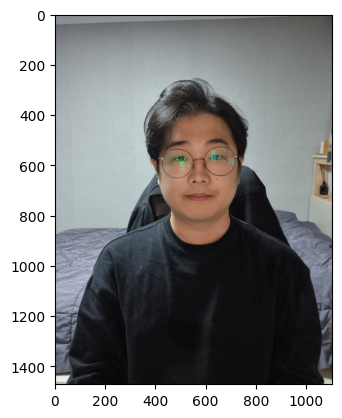

In [ ]:
my_image_path = data_dir+'KakaoTalk_Photo_2023-10-03-23-11-14 013.jpeg' # 본인 이미지가 있는 경로를 가지고 온다.
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show() # 이미지를 출력해준다. (실제 출력)

# 2. 얼굴 검출 & 랜드마크 검출 하기

rectangles[[(419, 491) (740, 812)]]


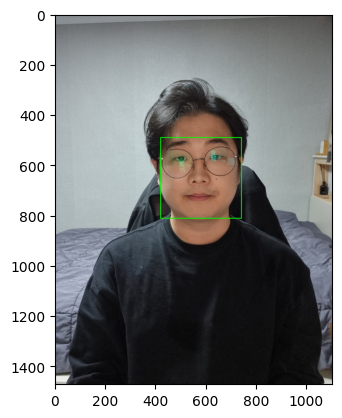

In [ ]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [ ]:
model_path = '/content/drive/MyDrive/아이펠/EXPLORATION_RS6/data/model/shape_predictor_68_face_landmarks.dat'
    # 저장한 landmark 모델의 주소를 model_path 변수에 저장
landmark_predictor = dlib.shape_predictor(model_path)
    # dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
    # landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
    # dlib.rectangle: 내부를 예측하는 박스
    # dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄

In [ ]:
dlib_rects

rectangles[[(419, 491) (740, 812)]]

In [ ]:
list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

68


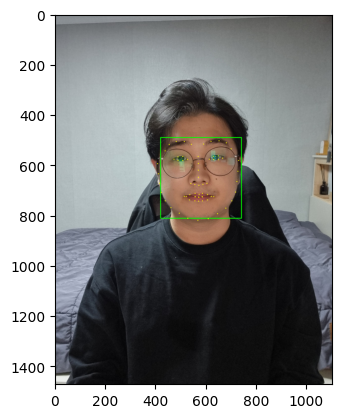

In [ ]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB 이미지로 전환
plt.imshow(img_show_rgb)
    # 이미지를 준비
plt.show()
    # 이미지를 출력

In [ ]:
# zip() : 두 그룹의 데이터를 서로 엮어주는 파이썬의 내장 함수
# dlib_rects와 list_landmarks 데이터를 엮어 주었음
# dlib_rects : 얼굴 영역을 저장하고 있는 값
# → rectangles[[(345, 98) (531, 284)]]
# list_landmarks : 68개의 랜드마크 값 저장(이목구비 위치(x,y))
# → [[(368, 153), (368, 174), (371, 195), (376, 215), (382, 235), (391, 252), (404, 266), (420, 277), (441, 279), (461, 276), (480, 266), (495, 252), (508, 235), (516, 216), (520, 195), (523, 173), (524, 151), (377, 131), (386, 119), (399, 116), (413, 118), (425, 124), (454, 121), (466, 114), (481, 112), (494, 114), (503, 127), (439, 143), (438, 156), (438, 169), (437, 182), (423, 197), (431, 199), (438, 200), (446, 199), (454, 197), (391, 147), (399, 142), (409, 143), (416, 149), (408, 150), (399, 150), (464, 147), (472, 141), (482, 141), (489, 145), (482, 149), (473, 149), (411, 227), (421, 222), (432, 218), (439, 220), (446, 218), (458, 222), (471, 227), (458, 234), (446, 238), (438, 238), (431, 238), (420, 235), (415, 227), (432, 227), (439, 228), (447, 227), (466, 227), (446, 228), (438, 229), (431, 228)]]

for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[33]) # 입술의 index는 30 입니다
    x = landmark[33][0] # 이미지에서 입술 부위의 x값
    y = landmark[33][1] - dlib_rect.height()//2 # 이미지에서 입술 부위의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수//2 → (437, 182-(186+1//2))
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수 (531-345+1) → max(x) - min(x) +1(픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(571, 681)
(x,y) : (571,520)
(w,h) : (322,322)


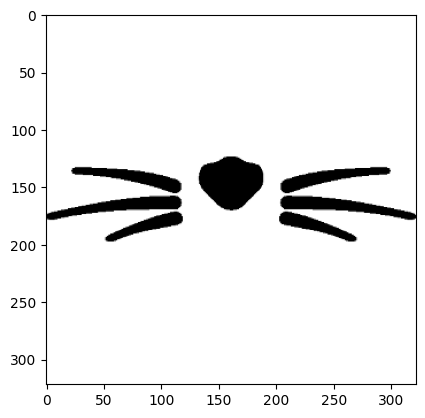

(322, 322, 3)


In [ ]:
sticker_path = "/content/drive/MyDrive/아이펠/EXPLORATION_RS6/data/photo/24674.png" # 수염 이미지의 경로
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
img_rgb_sticker = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb_sticker) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show() # 이미지를 출력해준다. (실제 출력)
print (img_sticker.shape) # 사이즈를 조정한 왕관 수염의 차원 확인

# 3. 스티커 적용 위치 확인하기

In [ ]:
# x,y,w,h 모두 위에서 반복문 안에서 지정해준 값임
# x는 이미지에서 입술 부위의 x값 = 572
# y는 이미지에서 입술 부위의 y값 = 556
# w는 얼굴 영역의 가로를 차지하는 픽셀의 수 = 322
# h는 얼굴 영역의 가로를 차지하는 픽셀의 수 = 322
refined_x = x - w // 2 # 437 - (187//2) = 437-93 = 344
refined_y = y -10#- h # 89-187 = -98
# 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정합니다. 이미지 시작점은 top-left 좌표이기 때문입니다.
# 즉, refined_x, refined_y값에서 왕관 이미지가 시작됨
print (f'(x,y) : ({refined_x},{refined_y})')
# 우리는 현재 이마 자리에 왕관을 두고 싶은건데, 이마위치 - 왕관 높이를 했더니 이미지의 범위를 초과하여 음수가 나오는 것
# opencv는 ndarray데이터를 사용하는데, ndarray는 음수인덱스에 접근 불가하므로 스티커 이미지를 잘라 줘야 한다.

(x,y) : (410,510)


In [ ]:
# 왕관 이미지가 이미지 밖에서 시작하지 않도록 조정이 필요함
# 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)
# 현재 상황에서는 -y 크기만큼 스티커를 crop 하고, top 의 x좌표와 y 좌표를 각각의 경우에 맞춰 원본 이미지의 경계 값으로 수정하면 아래와 같은 형식으로 나옵니다.
# 음수값 만큼 왕관 이미지(혹은 추후 적용할 스티커 이미지)를 자른다.
if refined_x < 0:
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
# 왕관 이미지를 씌우기 위해 왕관 이미지가 시작할 y좌표 값 조정
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] # refined_y가 -98이므로, img_sticker[98: , :]가 된다. (187, 187, 3)에서 (89, 187, 3)이 됨 (187개 중에서 98개가 잘려나감)
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (410,510)


# 4.스티커 적용하기

In [ ]:
# sticker_area는 원본이미지에서 스티커를 적용할 위치를 crop한 이미지 입니다.
# 예제에서는 (344,0) 부터 (344+187, 0+89) 범위의 이미지를 의미합니다.
# 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)
# img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_show[0:0+89, 344:344+187]
# img_show[0:89, 344:531]
# 즉, x좌표는 344~531 / y좌표는 0~89가 됨
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# 왕관 이미지에서 사용할 부분은 0이 아닌 색이 있는 부분을 사용합니다.
# 왕관 이미지에서 0이 나오는 부분은 흰색이라는 뜻, 즉 이미지가 없다는 소리임.
# 현재 왕관 이미지에서는 왕관과 받침대 밑의 ------ 부분이 됨
# 그렇기 때문에 0인 부분(이미지가 없는 부분)은 제외하고 적용
# sticker_area는 원본 이미지에서 스티커를 적용할 위치를 미리 잘라낸 이미지입니다.
# 즉, 왕관 이미지에서 왕관 이미지가 없는 부분(왕관과 받침대 밑의 ------ 부분)은 원본 이미지에서 미리 잘라놓은 sticker_area(스티커 적용할 부분 만큼 원본 이미지에서 자른 이미지)를 적용하고,
# 나머지 부분은 스티커로 채워주면 됨
# np.where는 조건에 해당하는 인덱스만 찾아서 값을 적용하는 방법이다.
# 아래 코드에서는 img_sticker가 0일 경우(왕관 이미지에서 왕관 부분 제외한 나머지 이미지)에는 sticker_area(원본 이미지에서 스티커를 적용할 위치를 미리 잘라낸 이미지)를 적용하고,
# 나머지 부분은 img_sticker(왕관 이미지)를 적용한다.
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)
print("슝~")

슝~


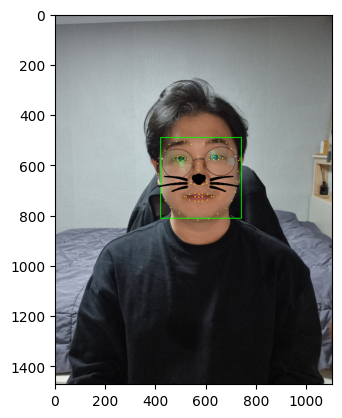

In [ ]:
# 왕관 이미지를 적용한 이미지를 보여준다.
# 얼굴 영역(7-3)과 랜드마크(7-4)를 미리 적용해놓은 img_show에 왕관 이미지를 덧붙인 이미지가 나오게 된다.)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

#5. 문제점 찾아보기
- 랜드마크를 할 지점을 정확하게 색인하지 못하면 출력이 안되는 문제점이 있음.
- 사진의 밝기에 따른 랜드마크의 성능저하가 발생할 수 있음
- 얼굴과 유사한 형태의 경우 일부 출력이 안 될 수 있음

In [ ]:
def photo(a):
  my_image_path = data_dir+a # 본인 이미지가 있는 경로를 가지고 온다.
  img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
  img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
  img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
  plt.imshow(img_rgb) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)

  # detector를 선언합니다
  detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환

  img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
  dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

  # 찾은 얼굴 영역 박스 리스트
  # 여러 얼굴이 있을 수 있습니다

  for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
      l = dlib_rect.left() # 왼쪽
      t = dlib_rect.top() # 위쪽
      r = dlib_rect.right() # 오른쪽
      b = dlib_rect.bottom() # 아래쪽

      cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

  img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
  plt.imshow(img_show_rgb)

  list_landmarks = []

  # 얼굴 영역 박스 마다 face landmark를 찾아냅니다
  # face landmark 좌표를 저장해둡니다
  for dlib_rect in dlib_rects:
      points = landmark_predictor(img_rgb, dlib_rect)
          # 모든 landmark의 위치정보를 points 변수에 저장
      list_points = list(map(lambda p: (p.x, p.y), points.parts()))
          # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
      list_landmarks.append(list_points)
          # list_landmarks에 랜드마크 리스트를 저장

  # list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
  for landmark in list_landmarks:
      for point in landmark:
          cv2.circle(img_show, point, 2, (0, 255, 255), -1)
              # cv2.circle: OpenCV의 원을 그리는 함수
              # img_show 이미지 위 각각의 point에
              # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
              # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

  img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
      # RGB 이미지로 전환
  plt.imshow(img_show_rgb)
      # 이미지를 준비
  plt.show()
      # 이미지를 출력

## 5-1. 안경 벗은 경우
- 이상없이 출력되었음

rectangles[[(290, 504) (675, 889)]]


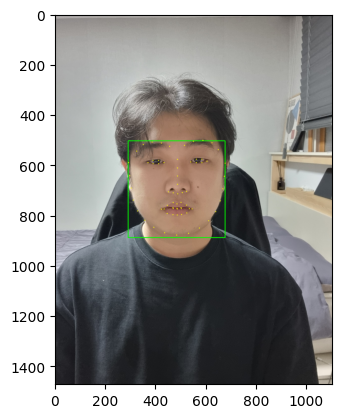

In [ ]:
photo("KakaoTalk_Photo_2023-10-04-02-19-41 001.jpeg")

## 2. 우/좌측 방향의 경우
- 우측의 경우 인식 오류지만 좌측의 경우는 인식을 한 것을 볼 수 있음
- 사진 확인 결과 우측의 경우 오른쪽 눈을 찾기 어려운 것으로 추측되며 이로 인하여 정삭적으로 랜드마크를 못한 것으로 확인됨


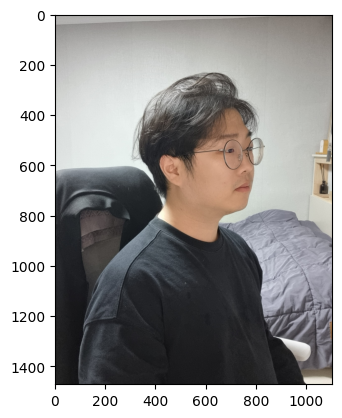

In [ ]:
photo("KakaoTalk_Photo_2023-10-04-02-19-41 012.jpeg")

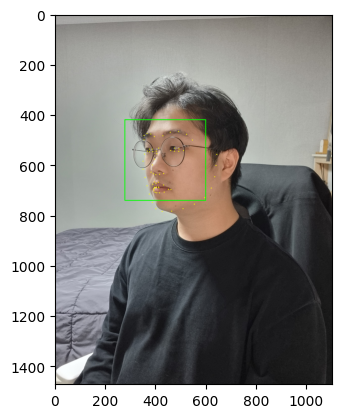

In [ ]:
photo("KakaoTalk_Photo_2023-10-04-02-19-41 011.jpeg")

## 3. 우측방향에서 정면 바라본 경우
- 확인 결과 우측방향에서 정면을 바라본 경우 정확하게 랜드마크를 건 것을 확인 할 수 있음


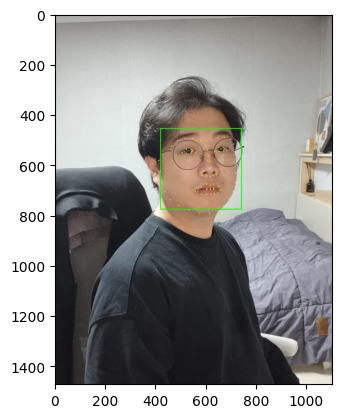

In [ ]:
photo("KakaoTalk_Photo_2023-10-04-02-19-41 010.jpeg")

## 4. 아래측 방향의 경우
- 랜드마크를 비교적 잘 한 것으로 확인되는데 육안으로 확인 결과 사진 내에 눈동자를 찾기 어려운데 인식한 것으로 확인
- 인접한 피부와 다른 색상(살색과 검정색)의 차이로 구분을 하는 것으로 추측됨

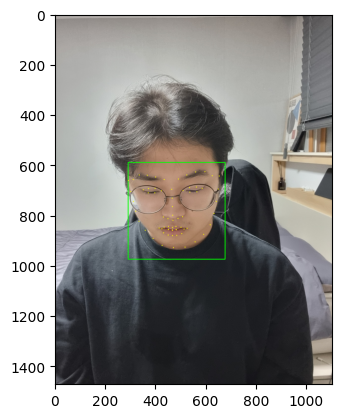

In [ ]:
photo("KakaoTalk_Photo_2023-10-04-02-19-41 003.jpeg")

## 5. 위측 방향의 경우
- 랜드마크를 비교적 잘 한 것으로 확인되며 아래측보다는 눈동자의 크기가 커져 살색과 검정색과의 경계선을 크게 구분 지은 것으로 확인됨

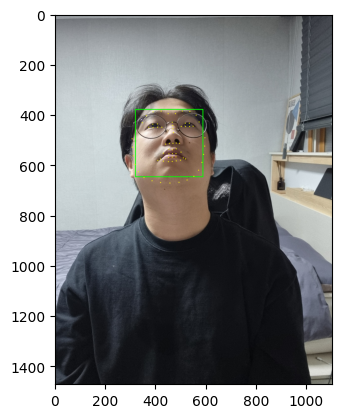

In [ ]:
photo("KakaoTalk_Photo_2023-10-04-02-19-41 002.jpeg")

# 6. 얼굴이 없는 경우
- 유사한 얼굴을 찾아서 랜드마크를 할 것이라 추측했는데, 인식을 하지 못한 것은 의외였음

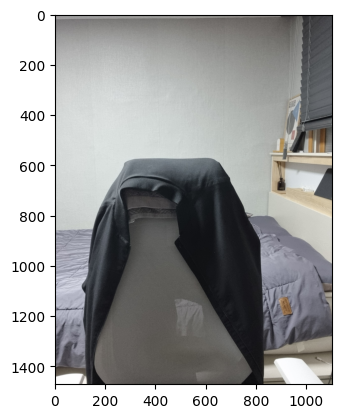

In [ ]:
photo("KakaoTalk_Photo_2023-10-04-02-19-41 005.jpeg")

## 7. 얼굴과 유사한 이미지의 경우
- 사람의 얼굴과 유사한 식빵인형의 사진의 랜드마크를 요청하였지만 인식하지 못함.

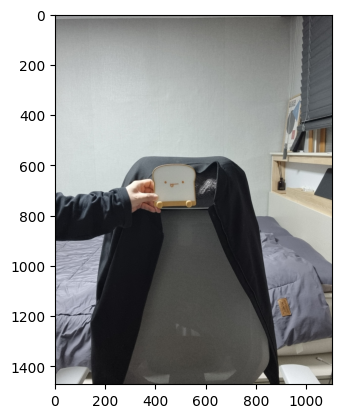

In [ ]:
photo("KakaoTalk_Photo_2023-10-04-02-19-41 004.jpeg")

## 8. 원거리의 경우
- 생각보다 인식을 잘 한 것으로 보임. 아마 사진의 화질에 따라 마킹의 차이가 있을 것으로 보임

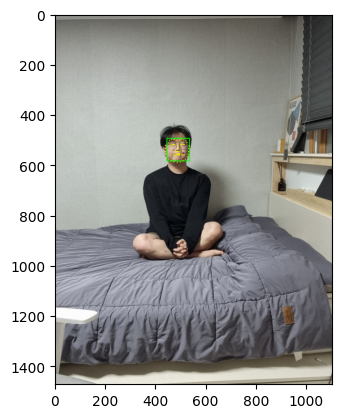

In [ ]:
photo("KakaoTalk_Photo_2023-10-04-02-19-41 009.jpeg")

## 8. 밝기가 어두운 경우
- 인간의 육안으로도 확인하기 어려운 사진의 경우 랜드마크를 못하는 것으로 확인됨

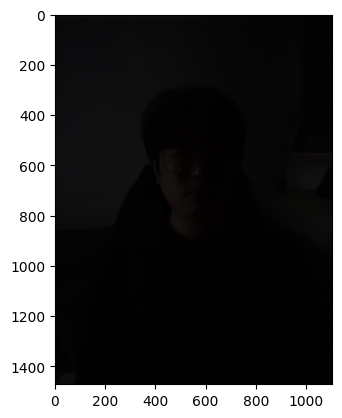

In [ ]:
photo("KakaoTalk_Photo_2023-10-04-02-19-41 006.jpeg")

# 9. 일부 밝은 경우
- 어느정도 색상의 변화가 감지되면 마킹이 가능한 것으로 확인됨
- 다만 입, 눈, 턱의 경계를 정확하게 마킹하지 못하는 것으로 확인됨

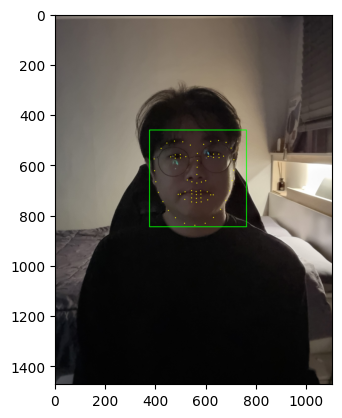

In [ ]:
photo("KakaoTalk_Photo_2023-10-04-02-19-41 007.jpeg")

## 10. 이전사진 대비 조명 추가
- 사진내의 사진에서 명암의 차이로 인하여 선명도가 향상되었더니 9번 사진보다 더 뚜렷하게 마킹을 하는 것으로 확인됨

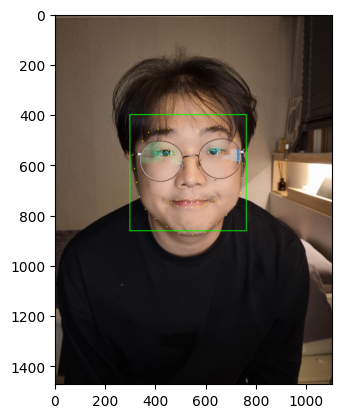

In [ ]:
photo("KakaoTalk_Photo_2023-10-04-02-19-41 008.jpeg")

# 회고
- 스티커의 출력 문제로 일부 어려움을 겪었지만 해결하였습니다.
- 여러명의 사람이 공존하는 사진을 학습했을 경우에 대한 주제를 실험하지 못한 아쉬움이 있음
- 진행간에 화면 밝기가 영향을 끼치는 건지 선명도가 영향을 끼치는 건지 제 실험환경과 비슷한 유색인종인 흑인관련 사진으로 랜드마크 실험해보는 것도 진행해보면 좋을듯하다고 느낌
- 랜드마크의 경우 마킹이 안되는 지점이 있는 경우 출력이 안되는 경우가 발생함(ex. 우측방향의 경우)
